# Problemas de Automatización y Robotica
## Tema 3. Cinemática de robots industriales



### llamamos a las librerias necesarias

In [2]:
import sympy as sp
import matplotlib.pyplot as ptl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sympy import Matrix
sp.init_printing()
%matplotlib inline

### Creamos el programa necesario para tener matrices de rotación asi como su representacion

In [3]:
class Rot:
    def __init__(self, alpha=sp.symbols('alpha')): #alpha=sp.symbols('alpha')
        """Rot class: has methods Rox(), Roy(), Roz and __init__()."""
        alpha = alpha*sp.pi/180 #Convierte de grados a radianes
        self.matriz = sp.eye(3)
        self.x = sp.Matrix([[1, 0, 0],[0, sp.cos(alpha), -sp.sin(alpha)],[0, sp.sin(alpha), sp.cos(alpha)]])
        self.y = sp.Matrix([[sp.cos(alpha), 0, sp.sin(alpha)],[0, 1, 0],[-sp.sin(alpha), 0, sp.cos(alpha)]])
        self.z = sp.Matrix([[sp.cos(alpha), -sp.sin(alpha), 0],[sp.sin(alpha), sp.cos(alpha),0],[0, 0, 1]])
        
    def Rox(self):
        self.matriz = self.x
        return self.matriz

    
    def Roy(self):
        self.matriz = self.y
        return self.matriz
    
    def Roz(self):
        self.matriz = self.z
        return self.matriz
           

class Rotra(Rot):
    def __init__(self, alpha=sp.symbols('alpha'), Trox = sp.symbols('x'), Troy = sp.symbols('y'), Troz = sp.symbols('z')):
        Rot.__init__(self, alpha)
        self.tras = sp.Matrix([Trox,Troy,Troz])
        
    def Tra(self):
        self.matriz = self.matriz.row_join(self.tras)
        self.matriz = self.matriz.col_join(sp.Matrix([[0,0,0,1]]))
        return self.matriz
        
 
    def Rox(self):
        self.matriz = self.x
        self.matriz = self.matriz.row_join(self.tras)
        self.matriz = self.matriz.col_join(sp.Matrix([[0,0,0,1]]))
        return self.matriz
    
    def Roy(self):
        self.matriz = self.y
        self.matriz = self.matriz.row_join(self.tras)
        self.matriz = self.matriz.col_join(sp.Matrix([[0,0,0,1]]))
        return self.matriz
    
    def Roz(self):
        self.matriz = self.z
        self.matriz = self.matriz.row_join(self.tras)
        self.matriz = self.matriz.col_join(sp.Matrix([[0,0,0,1]]))
        return self.matriz   

    # Hacemos su representacio en matplotlib
    
def sacar_ejes(origen, direc):
    ox, oy, oz, uno = origen

    fx = ox + direc[0]
    fy = oy + direc[1]
    fz = oz + direc[2]
    
    x = np.array([ox,fx])
    y = np.array([oy,fy])
    z = np.array([oz,fz])
    
    return x, y, z

def Pintar_ejes(T):
    
    # ax = plt.axes(projection='3d')  #Hay que copiar esta linea donde queramos usar este metodo
    
    origen = T[:,3]
    u = T[0,:]
    v = T[1,:]
    w = T[2,:]
    
    a, b, c = sacar_ejes(origen, u)
    ax.plot(a,b,c, color="red")
    ax.text(a[-1], b[-1], c[-1], r"$X$", fontsize=20, color="red")
    a, b, c = sacar_ejes(origen, v)
    ax.plot(a,b,c, color = "blue")
    ax.text(a[-1], b[-1], c[-1], r"$Y$", fontsize=20, color="blue")
    a, b, c = sacar_ejes(origen, w)
    ax.plot(a,b,c, color="green")
    ax.text(a[-1], b[-1], c[-1], r"$Z$", fontsize=20, color="green")
    

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

print ('Las matrices de rotacion son:')
T = Rotra()
T.x, T.y, T.z

Las matrices de rotacion son:


⎛                          ⎡   ⎛π⋅α⎞         ⎛π⋅α⎞⎤  ⎡   ⎛π⋅α⎞      ⎛π⋅α⎞   ⎤⎞
⎜⎡1     0          0    ⎤, ⎢cos⎜───⎟   0  sin⎜───⎟⎥, ⎢cos⎜───⎟  -sin⎜───⎟  0⎥⎟
⎜⎢                      ⎥  ⎢   ⎝180⎠         ⎝180⎠⎥  ⎢   ⎝180⎠      ⎝180⎠   ⎥⎟
⎜⎢      ⎛π⋅α⎞      ⎛π⋅α⎞⎥  ⎢                      ⎥  ⎢                      ⎥⎟
⎜⎢0  cos⎜───⎟  -sin⎜───⎟⎥  ⎢    0      1     0    ⎥  ⎢   ⎛π⋅α⎞     ⎛π⋅α⎞    ⎥⎟
⎜⎢      ⎝180⎠      ⎝180⎠⎥  ⎢                      ⎥  ⎢sin⎜───⎟  cos⎜───⎟   0⎥⎟
⎜⎢                      ⎥  ⎢    ⎛π⋅α⎞        ⎛π⋅α⎞⎥  ⎢   ⎝180⎠     ⎝180⎠    ⎥⎟
⎜⎢      ⎛π⋅α⎞     ⎛π⋅α⎞ ⎥  ⎢-sin⎜───⎟  0  cos⎜───⎟⎥  ⎢                      ⎥⎟
⎜⎢0  sin⎜───⎟  cos⎜───⎟ ⎥  ⎣    ⎝180⎠        ⎝180⎠⎦  ⎣   0          0      1⎦⎟
⎝⎣      ⎝180⎠     ⎝180⎠ ⎦                                                    ⎠

### Problema 1


Deducir la matriz de rotación resultante de realizar las siguientes operaciones respecto de dos sistemas de referencia {A} fijo y {B} móvil:

a) Rotar un ángulo de 90º respecto del eje ZA.

b) Rotar un ángulo de 45º respecto del eje XB. 

c) Rotar un ángulo de 30º respecto del eje ZB.

In [3]:
T1 = Rot(90).Roz() #a
T2 = Rot(45).Rox() #b
T3 = Rot(30).Roz() #c
T1*T2*T3

⎡-√2   -√6   √2⎤
⎢────  ────  ──⎥
⎢ 4     4    2 ⎥
⎢              ⎥
⎢ √3           ⎥
⎢ ──   -1/2  0 ⎥
⎢ 2            ⎥
⎢              ⎥
⎢ √2    √6   √2⎥
⎢ ──    ──   ──⎥
⎣ 4     4    2 ⎦

In [4]:
sp.N(T1*T2*T3)
    

⎡-0.353553390593274  -0.612372435695794  0.707106781186548⎤
⎢                                                         ⎥
⎢0.866025403784439          -0.5                 0        ⎥
⎢                                                         ⎥
⎣0.353553390593274   0.612372435695794   0.707106781186548⎦

### Problema 2

Sea un sistema de coordenadas {B} que surge al realizar las siguientes operaciones a partir del sistema de referencia {A}:

a) Rotar un ángulo de 90º respecto del eje XA.

b) Trasladar 5 unidades de longitud a lo largo del eje XA.

c) Rotar un ángulo de 45º respecto del eje YA.

Sabemos que las coordenadas homogéneas de un vector P son P=(1,1,1,1)T en el sistema de coordenadas {B}. Deducir las coordenadas de P en el sistema de
referencia {A}

In [125]:
T1 = Rotra(90,0,0,0).Rox()
T2 = Rotra(0,5,0,0).Tra()
T3 = Rotra(45,0,0,0).Roy()
P = sp.Matrix([1,1,1,1])
T3*T2*T1*P, T3*T2*T1, T3*T2, T3, T2


⎛⎡ 7⋅√2 ⎤  ⎡ √2   √2       5⋅√2 ⎤  ⎡ √2      √2   5⋅√2 ⎤  ⎡ √2      √2   ⎤    
⎜⎢ ──── ⎥, ⎢ ──   ──  0    ──── ⎥, ⎢ ──   0  ──   ──── ⎥, ⎢ ──   0  ──  0⎥, ⎡1
⎜⎢  2   ⎥  ⎢ 2    2         2   ⎥  ⎢ 2       2     2   ⎥  ⎢ 2       2    ⎥  ⎢ 
⎜⎢      ⎥  ⎢                    ⎥  ⎢                   ⎥  ⎢              ⎥  ⎢0
⎜⎢  -1  ⎥  ⎢ 0    0   -1    0   ⎥  ⎢ 0    1  0     0   ⎥  ⎢ 0    1  0   0⎥  ⎢ 
⎜⎢      ⎥  ⎢                    ⎥  ⎢                   ⎥  ⎢              ⎥  ⎢0
⎜⎢-5⋅√2 ⎥  ⎢-√2   √2      -5⋅√2 ⎥  ⎢-√2      √2  -5⋅√2 ⎥  ⎢-√2      √2   ⎥  ⎢ 
⎜⎢──────⎥  ⎢────  ──  0   ──────⎥  ⎢────  0  ──  ──────⎥  ⎢────  0  ──  0⎥  ⎣0
⎜⎢  2   ⎥  ⎢ 2    2         2   ⎥  ⎢ 2       2     2   ⎥  ⎢ 2       2    ⎥    
⎜⎢      ⎥  ⎢                    ⎥  ⎢                   ⎥  ⎢              ⎥    
⎝⎣  1   ⎦  ⎣ 0    0   0     1   ⎦  ⎣ 0    0  0     1   ⎦  ⎣ 0    0  0   1⎦    

          ⎞
  0  0  5⎤⎟
         ⎥⎟
  1  0  0⎥⎟
         ⎥⎟
  0  1  0⎥⎟
         ⎥⎟
  0  0  1⎦⎟
          ⎟
          ⎟
          

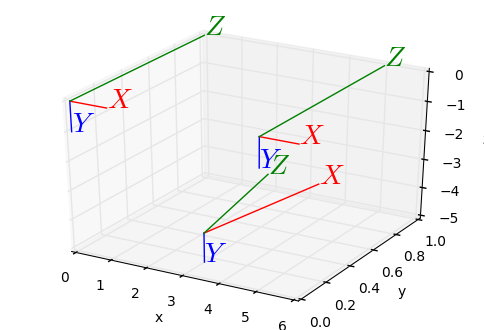

In [128]:
ax = ptl.axes(projection='3d')
Pintar_ejes(T1)
Pintar_ejes(T2*T1)
Pintar_ejes(T3*T2*T1)


## Problema 3

Un sistema de referencia OUVW ha sido girado 90º alrededor del eje OX y posteriormente trasladado un vector P (4,-2,6) con respecto al sistema coordenado
OXYZ. Calcular las coordenadas del vector rxyz con coordenadas ruvw (-3,2,-4).

In [5]:
T1 = Rotra(90,0,0,0).Rox()
T2 = Rotra(0,4,-2,6).Tra()
P = sp.Matrix([-3,2,-4,1])
T2*T1*P, T2, T1


⎛⎡1⎤, ⎡1  0  0  4 ⎤, ⎡1  0  0   0⎤⎞
⎜⎢ ⎥  ⎢           ⎥  ⎢           ⎥⎟
⎜⎢2⎥  ⎢0  1  0  -2⎥  ⎢0  0  -1  0⎥⎟
⎜⎢ ⎥  ⎢           ⎥  ⎢           ⎥⎟
⎜⎢8⎥  ⎢0  0  1  6 ⎥  ⎢0  1  0   0⎥⎟
⎜⎢ ⎥  ⎢           ⎥  ⎢           ⎥⎟
⎝⎣1⎦  ⎣0  0  0  1 ⎦  ⎣0  0  0   1⎦⎠

## Problema 4

 Encontrar las matrices de transformación homogénea i−1 b Ti para i=1,2 e indicar cómo
se obtendría la localización del sistema de referencia {S2} respecto al sistema base
{S0}.

![alt text](ejercicio4.png "Title") 

In [6]:
a = sp.symbols('a')
b = sp.symbols('b')
c = sp.symbols('c')

T0 = Rotra(90,0,0,0).Roz()
T1 = sp.Matrix([[-1, 0, 0, 0],[0, 0, -1, b ],[0, -1, 0, c],[0, 0, 0, 1]])
T2 = sp.Matrix([[0, -1, 0, a ],[0, 0, -1, c],[1, 0, 0, 0],[0, 0, 0, 1]])

T0, T1, T2, T1*T0, T2*T1*T0



⎛⎡0  -1  0  0⎤, ⎡-1  0   0   0⎤, ⎡0  -1  0   a⎤, ⎡0   1  0   0⎤, ⎡0  0  1  a -
⎜⎢           ⎥  ⎢             ⎥  ⎢            ⎥  ⎢            ⎥  ⎢            
⎜⎢1  0   0  0⎥  ⎢0   0   -1  b⎥  ⎢0  0   -1  c⎥  ⎢0   0  -1  b⎥  ⎢1  0  0    0
⎜⎢           ⎥  ⎢             ⎥  ⎢            ⎥  ⎢            ⎥  ⎢            
⎜⎢0  0   1  0⎥  ⎢0   -1  0   c⎥  ⎢1  0   0   0⎥  ⎢-1  0  0   c⎥  ⎢0  1  0    0
⎜⎢           ⎥  ⎢             ⎥  ⎢            ⎥  ⎢            ⎥  ⎢            
⎝⎣0  0   0  1⎦  ⎣0   0   0   1⎦  ⎣0  0   0   1⎦  ⎣0   0  0   1⎦  ⎣0  0  0    1

 b⎤⎞
  ⎥⎟
  ⎥⎟
  ⎥⎟
  ⎥⎟
  ⎥⎟
  ⎦⎠

⎛⎡0  -1  0  0⎤, ⎡0   1  0    0 ⎤, ⎡-1  0   0  0.5⎤, ⎡0   0   1  0.3⎤⎞
⎜⎢           ⎥  ⎢              ⎥  ⎢              ⎥  ⎢              ⎥⎟
⎜⎢1  0   0  0⎥  ⎢0   0  -1  0.4⎥  ⎢0   -1  0  0.4⎥  ⎢-1  0   0  0.4⎥⎟
⎜⎢           ⎥  ⎢              ⎥  ⎢              ⎥  ⎢              ⎥⎟
⎜⎢0  0   1  0⎥  ⎢-1  0  0   0.2⎥  ⎢0   0   1   0 ⎥  ⎢0   -1  0  0.4⎥⎟
⎜⎢           ⎥  ⎢              ⎥  ⎢              ⎥  ⎢              ⎥⎟
⎝⎣0  0   0  1⎦  ⎣0   0  0    1 ⎦  ⎣0   0   0   1 ⎦  ⎣0   0   0   1 ⎦⎠

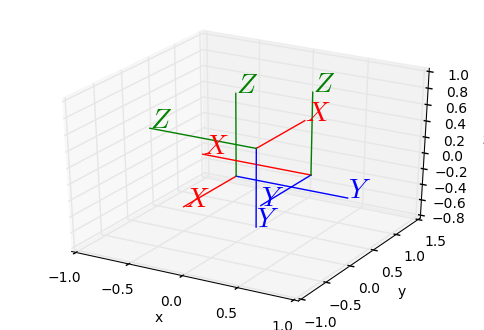

In [11]:
T8 = sp.Matrix([[-1,0,0,a],[0,-1,0,b],[0,0,1,0],[0, 0, 0, 1]])*((T1*T0).inv())
ax = ptl.axes(projection='3d')
a = 0.5
b = 0.4
c = 0.2
T0 = Rotra(90,0,0,0).Roz()
T1 = sp.Matrix([[-1, 0, 0, 0],[0, 0, -1, b ],[0, -1, 0, c],[0, 0, 0, 1]])
T2 = sp.Matrix([[0, -1, 0, a ],[0, 0, -1, c],[-1, 0, 0, 0],[0, 0, 0, 1]])
Pintar_ejes(T0)
Pintar_ejes(T8*T1*T0)
Pintar_ejes(T1*T0)

#Para sacar la ultima matriz de transformacion, se a sacado mediante la inversa del resultado
T0, T1*T0, T8*T1*T0, T8


## Problema 5

 El sistema de coordenadas B se encuentra superpuesto inicialmente con el sistema de coordenadas A. Este sistema (B) rota un ángulo de 40º alrededor del
eje z. Seguidamente rota 20º alrededor del nuevo eje x, y finalmente se traslada 4 m en una dirección paralela al eje x del sistema de coordenadas oriÇginal A. Determinar la matriz TAB (ó A
TB
).

## Problema 6